# Logistic Regression approach

Logistic Regression is a supervised classification algorithm. It performs its task of predictive analysis by predicting whether or not a given data entry belongs to a said category. In our multi-class problem, we will be implementing multinomial logistic regression, an extension of logistic regression that adds native support for multi-class classification problems.

*ref: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/ , 
https://www.geeksforgeeks.org/understanding-logistic-regression/*

## 1. Import the packages

In [90]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set() #Set the default seaborn style for graphics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import random
np.random.seed(42)

---

## 2. Import the data

In [14]:
# Train and Test sets, as previously split
X_train = pd.read_csv('Data/x_train.csv')
X_test = pd.read_csv('Data/x_test.csv')
y_train = pd.read_csv('Data/y_train.csv') 
y_test = pd.read_csv('Data/y_test.csv')

In [15]:
# Train and Test sets for Feature-engineered data
X_train_EGIN = pd.read_csv('Data/x_trainEGIN.csv')
X_test_EGIN = pd.read_csv('Data/x_testEGIN.csv')

> With the use of a training set that has clearly labelled the category each entry belongs to (under 'Salary'), we can see that **Logistic Regression is a Supervised Learning Algorithm**.

---

## 3. Implementing Logistic Regression through the various solvers

We will be implementing Linear Regression across the 5 different solvers as an initial test and to get a gauge of their performance. We will be running both the regular and feature engineered data to also observe if there are any changes in performance. The parameters will be kept to default with the exception of *max_iter*, as explained in the subsequent parts.

### 3.1 Limited-memory Broyden–Fletcher–Goldfarb–Shanno (lbfgs) solver

#### 3.1a Using regular data

In [21]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
log = model.fit(X_train, y_train.values.ravel())

C:\Users\65932\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> We note that we require a max_iter value that needs to be large enough in this solver.

In [47]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
log = model.fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.67      0.61      0.64     12726
           2       0.42      0.44      0.43     12898
           3       0.39      0.36      0.38     13145
           4       0.55      0.62      0.59     12426

    accuracy                           0.51     51195
   macro avg       0.51      0.51      0.51     51195
weighted avg       0.51      0.51      0.51     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.70      0.62      0.66      3276
           2       0.42      0.43      0.43      3193
           3       0.39      0.38      0.38      3230
           4       0.55      0.61      0.58      3100

    accuracy                           0.51     12799
   macro avg       0.51      0.51      0.51     12799
weighted avg       0.51      0.51      0.51     12799



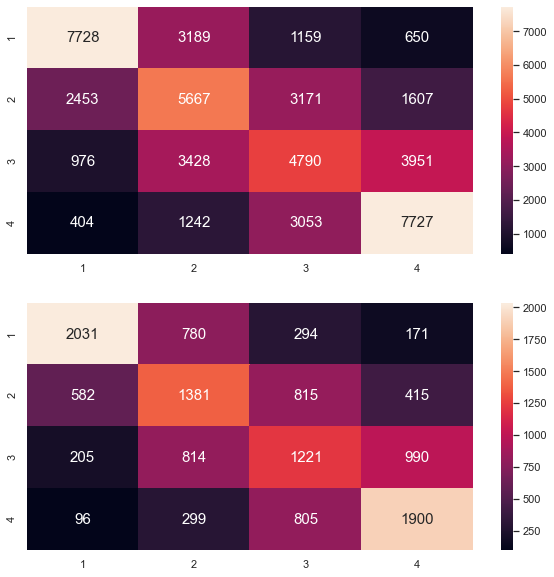

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,log.predict(X_test)))

In [49]:
log_f1 = f1_score(y_test, log.predict(X_test), average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log_f1)

F1 (Logistic Regression):  0.511295


> We note that the lbfgs solver has performed decently on both train and test sets, with the solver having similar performance on both train and test sets as observed from the confusion matrices and the classification report.

#### 3.1b Using feature engineered data

In [56]:
model_EGIN = LogisticRegression(solver='lbfgs', max_iter=100000)
log_EGIN = model_EGIN.fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.67      0.58      0.62     12726
           2       0.41      0.46      0.43     12898
           3       0.39      0.34      0.37     13145
           4       0.55      0.62      0.58     12426

    accuracy                           0.50     51195
   macro avg       0.50      0.50      0.50     51195
weighted avg       0.50      0.50      0.50     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.70      0.59      0.64      3276
           2       0.41      0.46      0.43      3193
           3       0.38      0.34      0.36      3230
           4       0.53      0.61      0.57      3100

    accuracy                           0.50     12799
   macro avg       0.51      0.50      0.50     12799
weighted avg       0.51      0.50      0.50     12799



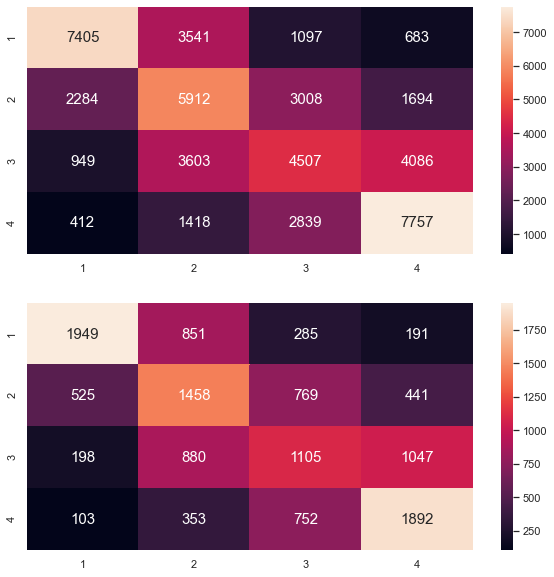

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,log_EGIN.predict(X_test_EGIN)))

In [24]:
log_f1_EGIN = f1_score(y_test, log_EGIN.predict(X_test_EGIN), average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log_f1_EGIN)

F1 (Logistic Regression):  0.501104


> We note that the lbfgs solver has performed decently on both train and test sets. Performance pattern between the train and test sets are similar. There is notably no improvement (in fact, a slight decrease) in performance when implementing with the feature engineered data instead.

### 3.2 Newton-CG solver

In [7]:
model2 = LogisticRegression(solver='newton-cg', max_iter=1000000000)
log2 = model2.fit(X_train, y_train.values.ravel())

log2_pred = log2.predict(X_test)

log2_f1 = f1_score(y_test, log2_pred, average='weighted')

print('F1 (Logistic Regression 2): ', "%.6f" % log2_f1)

C:\Users\65932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\65932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\65932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\65932\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


> We note that we had initially attempted with smaller values for *max_iter* (max_iter=1000). Despite attempting a significantly large value for max_iter parameter, the warning 'Line Search failed' was still returned. Hence, we will be omitting newton-cg solver from our subsequent hyperparameter tuning.

### 3.3 SAG solver

#### 3.3a Using regular data

In [22]:
model3 = LogisticRegression(solver='sag', max_iter=1000)
log3 = model3.fit(X_train, y_train.values.ravel())

C:\Users\65932\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


> We note that we require a max_iter value that needs to be large enough for the solver.

In [58]:
model3 = LogisticRegression(solver='sag', max_iter=100000)
log3 = model3.fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.66      0.60      0.63     12726
           2       0.41      0.45      0.43     12898
           3       0.39      0.31      0.34     13145
           4       0.53      0.64      0.58     12426

    accuracy                           0.50     51195
   macro avg       0.50      0.50      0.50     51195
weighted avg       0.50      0.50      0.49     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.69      0.61      0.65      3276
           2       0.41      0.45      0.43      3193
           3       0.38      0.31      0.34      3230
           4       0.52      0.63      0.57      3100

    accuracy                           0.50     12799
   macro avg       0.50      0.50      0.50     12799
weighted avg       0.50      0.50      0.50     12799



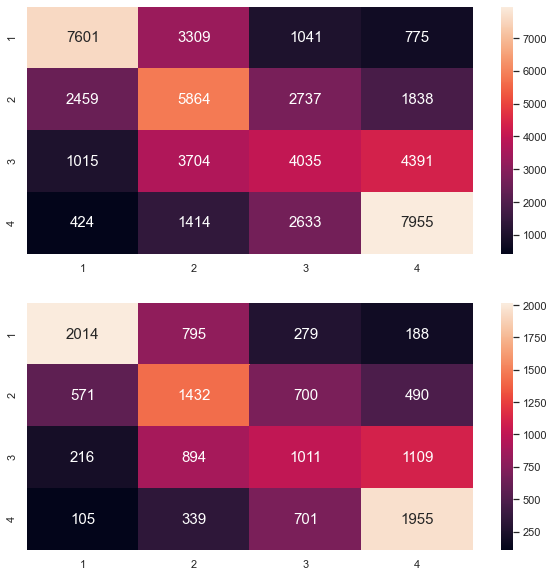

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log3.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log3.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log3.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,log3.predict(X_test)))

In [17]:
log3_pred = log3.predict(X_test)
log3_f1 = f1_score(y_test, log3_pred, average='weighted')

print('F1 (Logistic Regression 3): ', "%.6f" % log3_f1)

F1 (Logistic Regression 3):  0.498697


> We note that the SAG solver has performed decently on both train and test sets. Performance patterns seem to be similar between the train and test sets.

#### 3.3b Using feature engineered data

In [60]:
model3_EGIN = LogisticRegression(solver='sag', max_iter=100000)
log3_EGIN = model3_EGIN.fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.66      0.58      0.62     12726
           2       0.40      0.46      0.43     12898
           3       0.37      0.28      0.32     13145
           4       0.51      0.64      0.57     12426

    accuracy                           0.49     51195
   macro avg       0.49      0.49      0.48     51195
weighted avg       0.49      0.49      0.48     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.70      0.60      0.65      3276
           2       0.41      0.46      0.43      3193
           3       0.36      0.28      0.32      3230
           4       0.50      0.63      0.56      3100

    accuracy                           0.49     12799
   macro avg       0.49      0.49      0.49     12799
weighted avg       0.49      0.49      0.49     12799



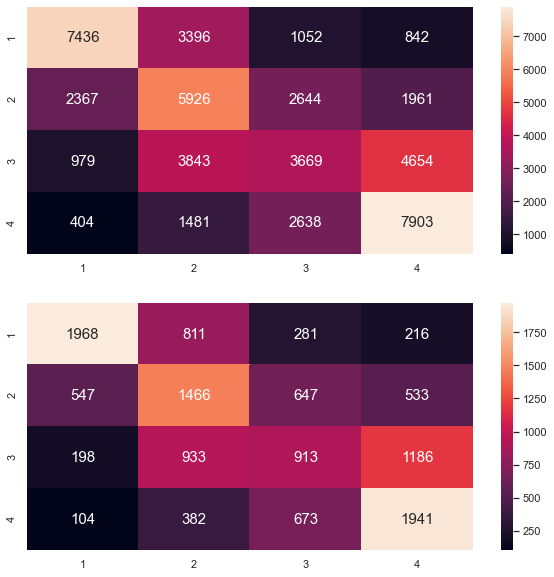

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log3_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log3_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log3_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,log3_EGIN.predict(X_test_EGIN)))

In [37]:
log3_f1_EGIN = f1_score(y_test, log3_EGIN.predict(X_test_EGIN), average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log3_f1_EGIN)

F1 (Logistic Regression):  0.488158


> We note that the SAG solver has performed decently on both train and test sets. Performance pattern between the train and test sets are similar. There is notably no improvement (in fact, a slight decrease) in performance when implementing with the feature engineered data instead.

### 3.4 SAGA solver

#### 3.4a Using regular data

In [25]:
model4 = LogisticRegression(solver='saga', max_iter=1000)
log4 = model4.fit(X_train, y_train.values.ravel())

C:\Users\65932\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


> We note that we require a max_iter value that needs to be large enough.

In [62]:
model4 = LogisticRegression(solver='saga', max_iter=100000)
log4 = model4.fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.65      0.60      0.62     12726
           2       0.41      0.44      0.42     12898
           3       0.37      0.29      0.33     13145
           4       0.52      0.64      0.57     12426

    accuracy                           0.49     51195
   macro avg       0.49      0.49      0.49     51195
weighted avg       0.49      0.49      0.49     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.68      0.62      0.65      3276
           2       0.41      0.44      0.42      3193
           3       0.36      0.30      0.33      3230
           4       0.51      0.63      0.57      3100

    accuracy                           0.49     12799
   macro avg       0.49      0.50      0.49     12799
weighted avg       0.49      0.49      0.49     12799



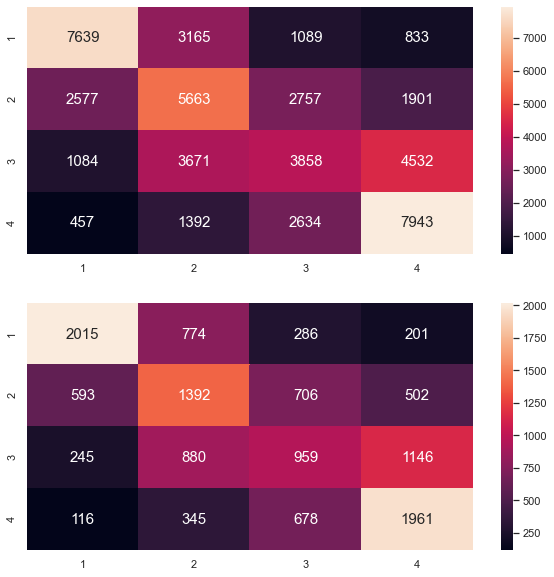

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log4.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log4.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log4.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,log4.predict(X_test)))

In [20]:
log4_pred = log4.predict(X_test)
log4_f1 = f1_score(y_test, log4_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log4_f1)

F1 (Logistic Regression):  0.490747


> We note that the SAGA solver has performed decently on both train and test sets. Performance patterns seem to be similar between the train and test sets.

#### 3.4b Using feature engineered data

In [65]:
model4_EGIN = LogisticRegression(solver='saga', max_iter=100000)
log4_EGIN = model4_EGIN.fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.65      0.60      0.62     12726
           2       0.40      0.44      0.42     12898
           3       0.36      0.27      0.31     13145
           4       0.51      0.64      0.56     12426

    accuracy                           0.48     51195
   macro avg       0.48      0.49      0.48     51195
weighted avg       0.48      0.48      0.48     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.68      0.61      0.64      3276
           2       0.40      0.43      0.42      3193
           3       0.35      0.27      0.30      3230
           4       0.49      0.63      0.55      3100

    accuracy                           0.48     12799
   macro avg       0.48      0.48      0.48     12799
weighted avg       0.48      0.48      0.48     12799



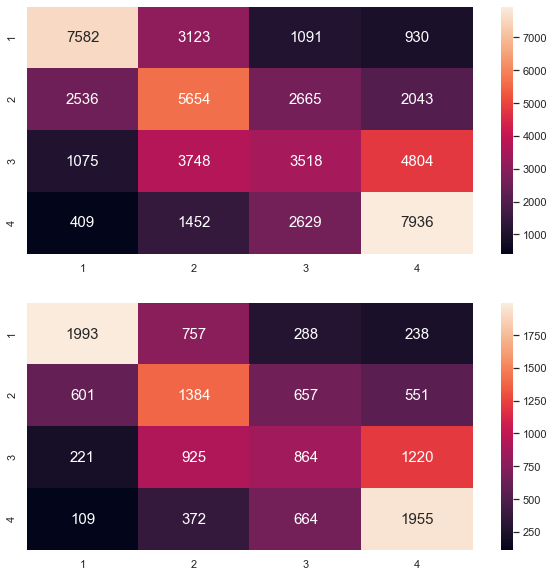

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log4_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log4_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log4_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,log4_EGIN.predict(X_test_EGIN)))

In [46]:
log4_f1_EGIN = f1_score(y_test, log4_EGIN.predict(X_test_EGIN), average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log4_f1_EGIN)

F1 (Logistic Regression):  0.479224


> We note that the SAGA solver has performed decently on both train and test sets. Performance pattern between the train and test sets are similar. There is notably no improvement (in fact, a decrease) in performance when implementing with the feature engineered data instead.

### 3.5 A Library for Large Linear Classification (liblinear) solver

#### 3.5a Using regular data

In [67]:
model5 = LogisticRegression(solver='liblinear', max_iter=1000)
log5 = model5.fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.65      0.60      0.63     12726
           2       0.41      0.46      0.43     12898
           3       0.40      0.29      0.33     13145
           4       0.53      0.68      0.60     12426

    accuracy                           0.50     51195
   macro avg       0.50      0.51      0.50     51195
weighted avg       0.50      0.50      0.50     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.68      0.62      0.65      3276
           2       0.42      0.45      0.43      3193
           3       0.40      0.30      0.34      3230
           4       0.52      0.67      0.58      3100

    accuracy                           0.51     12799
   macro avg       0.50      0.51      0.50     12799
weighted avg       0.51      0.51      0.50     12799



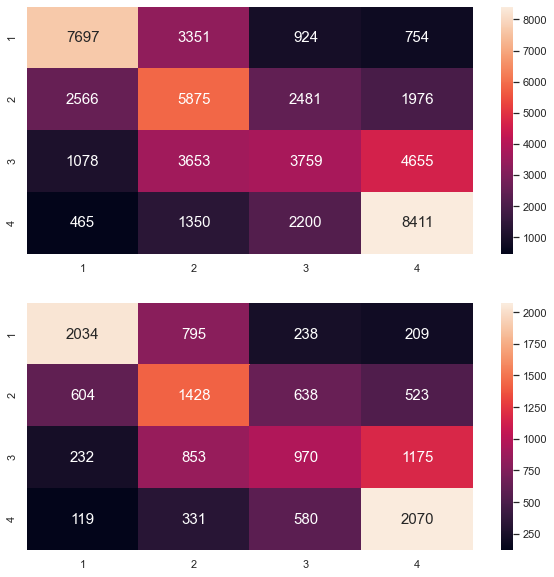

In [68]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log5.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log5.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log5.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,log5.predict(X_test)))

In [23]:
log5_pred = log5.predict(X_test)
log5_f1 = f1_score(y_test, log5_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log5_f1)

F1 (Logistic Regression):  0.502402


> We note that the liblinear solver has performed decently on both train and test sets. Performance patterns seem to be similar between the train and test sets.

#### 3.5b Using feature engineered data

In [69]:
model5_EGIN = LogisticRegression(solver='liblinear', max_iter=1000)
log5_EGIN = model5_EGIN.fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.65      0.62      0.63     12726
           2       0.41      0.44      0.43     12898
           3       0.40      0.29      0.34     13145
           4       0.53      0.67      0.59     12426

    accuracy                           0.50     51195
   macro avg       0.50      0.50      0.50     51195
weighted avg       0.50      0.50      0.49     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.68      0.63      0.65      3276
           2       0.41      0.44      0.42      3193
           3       0.39      0.30      0.34      3230
           4       0.52      0.66      0.58      3100

    accuracy                           0.50     12799
   macro avg       0.50      0.50      0.50     12799
weighted avg       0.50      0.50      0.50     12799



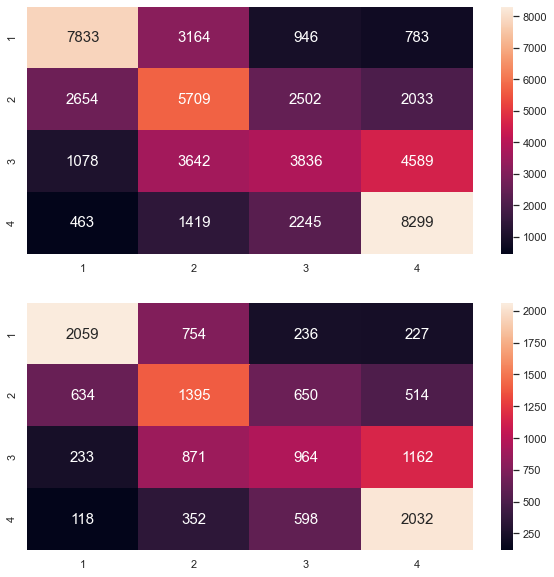

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, log5_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, log5_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,log5_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,log5_EGIN.predict(X_test_EGIN)))

In [45]:
log5_f1_EGIN = f1_score(y_test, log5_EGIN.predict(X_test_EGIN), average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log5_f1_EGIN)

F1 (Logistic Regression):  0.498409


> We note that the liblinear solver has performed decently on both train and test sets. Performance pattern between the train and test sets are similar. There is notably no improvement (in fact, a slight decrease) in performance when implementing with the feature engineered data instead.

Therefore, we have taken a look at the following solvers: lbfgs, newton-cg, sag, saga and liblinear. Aside from newton-cg, we observe that across all 4, the **use of the feature engineered data did not help improve performance**, instead leading to a decrement in performance in terms of F-1 score. It was also observed that the **solvers generally performed similarly on both the train and test data**, a positive step forward from the observations made in the SVMs attempt. **The *max_iter* parameter also has to be fulfilled with a sufficiently large value** as well, in most cases greater than 1000.

---

## 4. Hyperparameter Tuning

We will be exploring the various parameters of LogisticRegression(). We first explore the effects of varying *max_iter* across the solvers before arriving at the decision to settle on a constant *max_iter* value for the tuning. We will then implement RandomizedSearchCV and a further for loop to arrive at the optimal parameters and result.

### 4.1 Testing with different values of max_iter on the various solvers

##### lbfgs solver with different values of max_iter

In [43]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
log = model.fit(X_train, y_train.values.ravel())

log_pred = log.predict(X_test)
log_f1 = f1_score(y_test, log_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log_f1)

F1 (Logistic Regression):  0.511295


In [48]:
model = LogisticRegression(solver='lbfgs', max_iter=1000000)
log = model.fit(X_train, y_train.values.ravel())

log_pred = log.predict(X_test)
log_f1 = f1_score(y_test, log_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log_f1)

F1 (Logistic Regression):  0.511295


##### sag solver with different values of max_iter

In [50]:
model3 = LogisticRegression(solver='sag', max_iter=10000)
log3 = model3.fit(X_train, y_train.values.ravel())

log3_pred = log3.predict(X_test)
log3_f1 = f1_score(y_test, log3_pred, average='weighted')

print('F1 (Logistic Regression 3): ', "%.6f" % log3_f1)

F1 (Logistic Regression 3):  0.498763


In [51]:
model3 = LogisticRegression(solver='sag', max_iter=1000000)
log3 = model3.fit(X_train, y_train.values.ravel())

log3_pred = log3.predict(X_test)
log3_f1 = f1_score(y_test, log3_pred, average='weighted')

print('F1 (Logistic Regression 3): ', "%.6f" % log3_f1)

F1 (Logistic Regression 3):  0.498763


##### saga solver with different values of max_iter

In [57]:
model4 = LogisticRegression(solver='saga', max_iter=10000)
log4 = model4.fit(X_train, y_train.values.ravel())

log4_pred = log4.predict(X_test)
log4_f1 = f1_score(y_test, log4_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log4_f1)

F1 (Logistic Regression):  0.490747


In [62]:
model4 = LogisticRegression(solver='saga', max_iter=1000000)
log4 = model4.fit(X_train, y_train.values.ravel())

log4_pred = log4.predict(X_test)
log4_f1 = f1_score(y_test, log4_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log4_f1)

F1 (Logistic Regression):  0.490747


##### liblinear solver with different values of max_iter

In [66]:
model5 = LogisticRegression(solver='liblinear', max_iter=10000)
log5 = model5.fit(X_train, y_train.values.ravel())

log5_pred = log5.predict(X_test)
log5_f1 = f1_score(y_test, log5_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log5_f1)

F1 (Logistic Regression):  0.502402


In [68]:
model5 = LogisticRegression(solver='liblinear', max_iter=100000)
log5 = model5.fit(X_train, y_train.values.ravel())

log5_pred = log5.predict(X_test)
log5_f1 = f1_score(y_test, log5_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log5_f1)

F1 (Logistic Regression):  0.502402


In [71]:
model5 = LogisticRegression(solver='liblinear', max_iter=1000000)
log5 = model5.fit(X_train, y_train.values.ravel())

log5_pred = log5.predict(X_test)
log5_f1 = f1_score(y_test, log5_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % log5_f1)

F1 (Logistic Regression):  0.502402


Consolidating the runs with various max_iter values in sections 2 and 3, we observe that **changing *max_iter* values has no impact on F1-score across all the different solvers.** Therefore, we will not be considering different values of *max_iter* in our RandomizedSearchCV.

### 4.2 Tuning using RandomizedSearchCV
RandomizedSearchCV was chosen in favour of GridSearchCV in the interests of a limited resources to achieve our intended outcomes. However, we will be running 3 iterations of RandomizedSearchCV, as elaborated below.

In [73]:
params={'solver':('lbfgs','sag','saga','liblinear'), #note omission of newton-cg and max_iter, as explained prior
        'C':(0.001,0.01,0.1,1,10,100),
        'penalty':('l1','elasticnet','l2','none')}

##### 1st iteration

In [7]:
LogR = LogisticRegression(max_iter=10000)
search = RandomizedSearchCV(LogR, params, n_iter=100, n_jobs=-1, cv=2, random_state=42)
result = search.fit(X_train, y_train.values.ravel())

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.45061045 0.45565           nan        nan
        nan        nan 0.49618127 0.48651236 0.47912884 0.49299739
 0.50176777 0.48940326 0.48155094        nan        nan        nan
 0.47832799 0.49887689        nan        nan        nan        nan
 0.50083015 0.48934466 0.48125794 0.4998926  0.50176777 0.48938373
 0.48155094        nan        nan        nan 0.48117981 0.51213985
        nan        nan        nan        nan 0.50252957 0.48940326
 0.48151187 0.50088877 0.50176777 0.48942279 0.48155094        nan
        nan        nan 0.48149234 0.51325324        nan        nan
        nan   

Best Score: 0.5140150533183814
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


##### 2nd iteration

In [17]:
LogR = LogisticRegression(max_iter=10000)
search = RandomizedSearchCV(LogR, params, n_iter=100, n_jobs=-1, cv=3, random_state=42)
result = search.fit(X_train, y_train.values.ravel())

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.45682196 0.46209591        nan        nan
        nan        nan 0.49803692 0.48926653 0.48209786 0.49485301
 0.50436566 0.49172771 0.48434417        nan        nan        nan
 0.48203926 0.50053716        nan        nan        nan        nan
 0.50313507 0.49205977 0.48420744 0.50012697 0.50436566 0.49172771
 0.48438324        nan        nan        nan 0.48418791 0.51256959
        nan        nan        nan        nan 0.5037992  0.49180584
 0.48430511 0.50096689 0.50436566 0.49170817 0.48436371        nan
        nan        nan 0.48434417 0.51303838        nan        nan
        nan   

Best Score: 0.5130383826545561
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}


##### 3rd iteration

In [47]:
LogR = LogisticRegression(max_iter=10000)
search = RandomizedSearchCV(LogR, params, n_iter=100, n_jobs=-1, cv=4, random_state=42)
result = search.fit(X_train, y_train.values.ravel())

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.4591074  0.46457667        nan        nan
        nan        nan 0.49717744 0.49053619 0.48477388 0.49690398
 0.50403349 0.49340754 0.48618028        nan        nan        nan
 0.48438325 0.50200215        nan        nan        nan        nan
 0.50467821 0.49309502 0.48623888 0.50016601 0.50403349 0.49336848
 0.48618028        nan        nan        nan 0.48608261 0.51258906
        nan        nan        nan        nan 0.50495165 0.49340755
 0.48621934 0.5014161  0.50403349 0.49340754 0.48618028        nan
        nan        nan 0.48619981 0.51268673        nan        nan
        nan   

Best Score: 0.5138196587967436
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


It is clear that across the 3 iterations, where we have incremented the *cv* parameter by 1 in each run, there is an **agreement on the optimal *solver* and *penalty* to be liblinear and l1**. Noting a lack of agreement on the *C* parameter's optimal value, we will implement a for loop to find the optimal value.

### 4.3 Further tuning with for loop
This will be the approach to finalise and obtain the optimal C value.

In [42]:
LogR2=[]

for i in range (1,100):
    ModelR = LogisticRegression(solver='liblinear', max_iter=10000, penalty = 'l1', C=i, random_state = 42)
    logR = ModelR.fit(X_train, y_train.values.ravel())
    logR_pred = logR.predict(X_test)
    logR_f1 = f1_score(y_test, logR_pred, average='weighted')
    LogR2.append((i,logR_f1))
    
x = pd.DataFrame(LogR2, columns = ['C', 'F1'])

In [43]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(x.sort_values('F1'))

     C        F1
0    1  0.507518
71  72  0.510051
70  71  0.510051
69  70  0.510051
68  69  0.510051
67  68  0.510051
66  67  0.510051
65  66  0.510051
64  65  0.510051
63  64  0.510051
62  63  0.510051
61  62  0.510051
60  61  0.510051
59  60  0.510051
58  59  0.510051
57  58  0.510051
56  57  0.510051
55  56  0.510051
54  55  0.510051
53  54  0.510051
52  53  0.510051
51  52  0.510051
72  73  0.510051
50  51  0.510051
73  74  0.510051
75  76  0.510051
96  97  0.510051
95  96  0.510051
94  95  0.510051
93  94  0.510051
92  93  0.510051
91  92  0.510051
90  91  0.510051
89  90  0.510051
88  89  0.510051
87  88  0.510051
86  87  0.510051
85  86  0.510051
84  85  0.510051
83  84  0.510051
82  83  0.510051
81  82  0.510051
80  81  0.510051
79  80  0.510051
78  79  0.510051
77  78  0.510051
76  77  0.510051
74  75  0.510051
97  98  0.510051
49  50  0.510051
47  48  0.510051
48  49  0.510051
37  38  0.510051
38  39  0.510051
39  40  0.510051
40  41  0.510051
98  99  0.510051
42  43  0.5100

> Under the above conditions which were agreed upon during the 3 iterations of RandomizedSearchCV, we find the optimal *C* parameter value to be 3.

---
### 5. Optimal Parameters and Results

In [86]:
ModelR = LogisticRegression(solver='liblinear', max_iter=10000, penalty = 'l1', C=3, random_state=42)
logR = ModelR.fit(X_train, y_train.values.ravel())
logR_pred = logR.predict(X_test)

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.66      0.63      0.64     12726
           2       0.42      0.46      0.44     12898
           3       0.41      0.29      0.34     13145
           4       0.55      0.70      0.61     12426

    accuracy                           0.52     51195
   macro avg       0.51      0.52      0.51     51195
weighted avg       0.51      0.52      0.51     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.69      0.65      0.67      3276
           2       0.43      0.46      0.44      3193
           3       0.40      0.29      0.33      3230
           4       0.54      0.69      0.61      3100

    accuracy                           0.52     12799
   macro avg       0.51      0.52      0.51     12799
weighted avg       0.51      0.52      0.51     12799



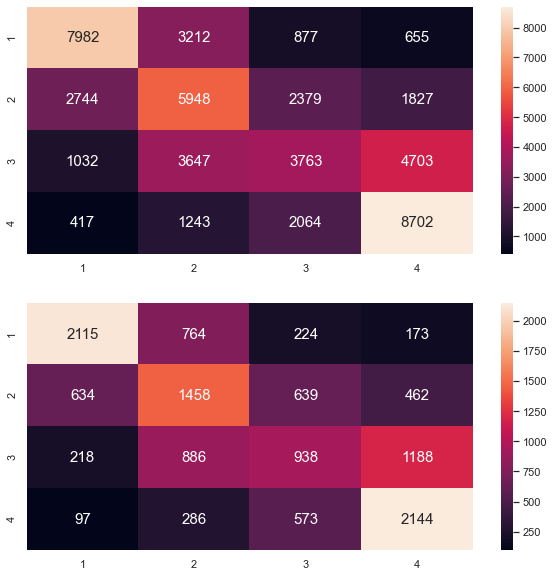

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, logR.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, logR.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,logR.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,logR.predict(X_test)))

In [45]:
logR_f1 = f1_score(y_test, logR_pred, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % logR_f1)

F1 (Logistic Regression):  0.512655


> The optimal performance result of LogisticRegression() for our dataset is found to be at F1-score of 0.512655, at parameters *solver* = 'liblinear', *max_iter* = 10000, *penalty* = 'l1', *C* = 3.

##### Feature Importance

Feature: 0 (Education), Score: -0.19651
Feature: 1 (Marital), Score: 0.08390
Feature: 2 (Sex), Score: 0.50491
Feature: 3 (Age), Score: -0.01740
Feature: 4 (Race), Score: 0.01043
Feature: 5 (Veteran), Score: -0.02999
Feature: 6 (Pro_Cert), Score: 2.63562
Feature: 7 (Gov_Cert), Score: 0.10530
Feature: 8 (Cert_Need), Score: 0.82695
Feature: 9 (Disability), Score: -0.34774
Feature: 10 (Citizenship), Score: 0.05570
Feature: 11 (Last Week Working Hrs), Score: -0.01053
Feature: 12 (Less than 35hrs for at least 1 week), Score: -0.94634
Feature: 13 (Detailed Household Status), Score: 0.07543
Feature: 14 (More than 35hrs Weekly), Score: 0.08193
Feature: 15 (HrsWeek), Score: -0.03295
Feature: 16 (Industry), Score: -0.01298
Feature: 17 (Occupation Group), Score: -0.35563
Feature: 18 (Occupation), Score: 0.00046
Feature: 19 (WorkClass), Score: 0.12884
Feature: 20 (Longest Industry), Score: 0.02763
Feature: 21 (Longest Job Class), Score: -0.17231


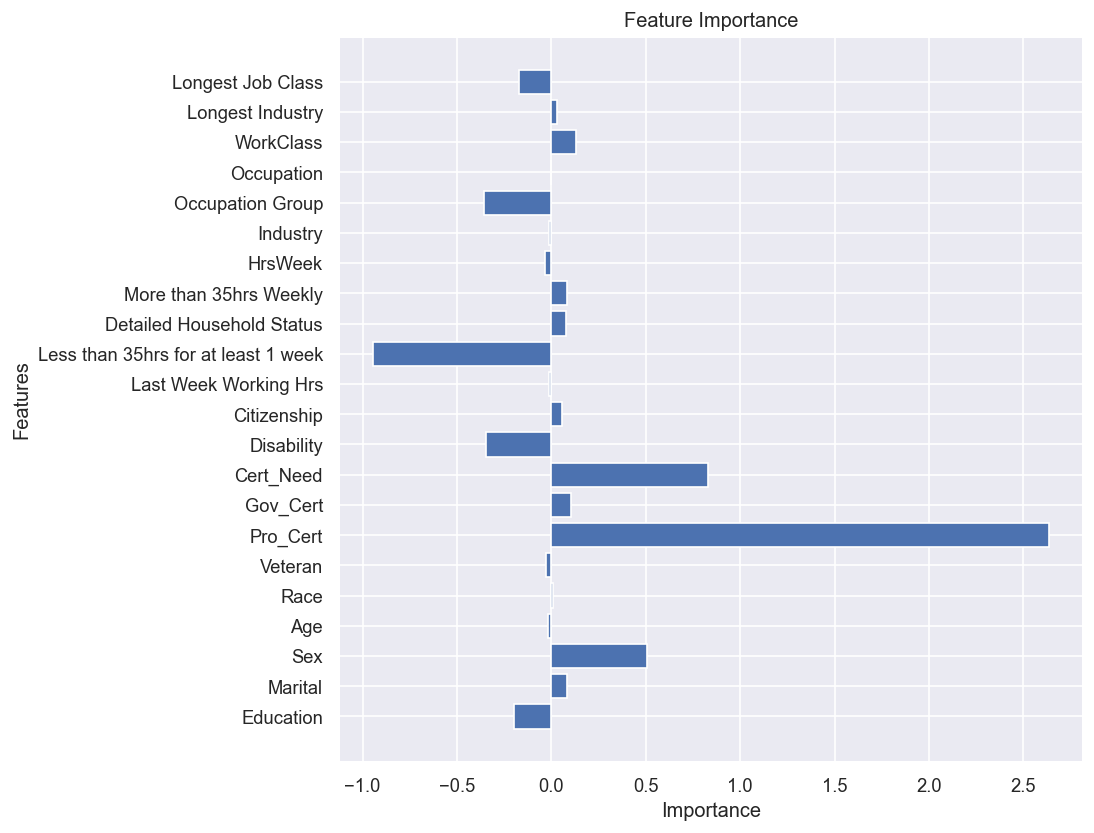

In [113]:
importance = logR.coef_[0]
features_list = ['Education', 'Marital', 'Sex', 'Age', 'Race', 'Veteran', 'Pro_Cert', 'Gov_Cert', 'Cert_Need', 'Disability', 'Citizenship', 'Last Week Working Hrs', 'Less than 35hrs for at least 1 week', 'Detailed Household Status', 'More than 35hrs Weekly', 'HrsWeek', 'Industry', 'Occupation Group', 'Occupation', 'WorkClass', 'Longest Industry', 'Longest Job Class']

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d (%s), Score: %.5f' % (i,features_list[i],v))

# plot feature importance
plt.figure(figsize=(8, 8), dpi=120)
plt.barh([features_list[x] for x in range(len(importance))],importance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

> We can see that the 3 most important features as identified by this logistic regression model appear to be, in order of importance, 'Pro_Cert', 'Cert_Need' and 'Sex'. The 3 least important starting from the least would be 'Less than 35hrs for at least 1 week', 'Occupation Group' and 'Disability'.

---
##### Additional:
We run through the entire process under the feature engineered data to compare if there is any potential improvement in performance.

In [73]:
params={'solver':('lbfgs','sag','saga','liblinear'), #note omission of newton-cg and max_iter, as explained prior
        'C':(0.001,0.01,0.1,1,10,100),
        'penalty':('l1','elasticnet','l2','none')}

##### 1st iteration

In [74]:
LogR_EGIN = LogisticRegression(max_iter=10000)
search_EGIN = RandomizedSearchCV(LogR_EGIN, params, n_iter=100, n_jobs=-1, cv=2, random_state=42)
result_EGIN = search_EGIN.fit(X_train_EGIN, y_train.values.ravel())

print('Best Score: %s' % result_EGIN.best_score_)
print('Best Hyperparameters: %s' % result_EGIN.best_params_)

C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.44728982 0.45498591        nan        nan
        nan        nan 0.4907706  0.47873817 0.4711593  0.48743041
 0.49850573 0.4821174  0.47350327        nan        nan        nan
 0.47119834 0.49532183        nan        nan        nan        nan
 0.49510689 0.48149234 0.47311261 0.49797833 0.49850573 0.4821174
 0.47350327        nan        nan        nan 0.47299541 0.51176872
        nan        nan        nan        nan 0.49909176 0.48198067
 0.47348373 0.49860337 0.49850573 0.4821174  0.4735228         nan
        nan        nan 0.47348373 0.51268681        nan        nan
        nan    

Best Score: 0.5144838292590976
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


##### 2nd iteration

In [75]:
LogR_EGIN = LogisticRegression(max_iter=10000)
search_EGIN = RandomizedSearchCV(LogR_EGIN, params, n_iter=100, n_jobs=-1, cv=3, random_state=42)
result_EGIN = search_EGIN.fit(X_train_EGIN, y_train.values.ravel())

print('Best Score: %s' % result_EGIN.best_score_)
print('Best Hyperparameters: %s' % result_EGIN.best_params_)

C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.45606016 0.46029886        nan        nan
        nan        nan 0.48870007 0.48127747 0.47574958 0.48957906
 0.49635707 0.48334798 0.47774197        nan        nan        nan
 0.47528079 0.49709933        nan        nan        nan        nan
 0.49897451 0.48305499 0.4775857  0.49778299 0.49635707 0.48334798
 0.47772243        nan        nan        nan 0.47748804 0.511632
        nan        nan        nan        nan 0.49897451 0.48328938
 0.4777029  0.49725559 0.49635707 0.48336752 0.47774197        nan
        nan        nan 0.47768337 0.51327278        nan        nan
        nan     

Best Score: 0.5140541068463718
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


##### 3rd iteration

In [76]:
LogR_EGIN = LogisticRegression(max_iter=10000)
search_EGIN = RandomizedSearchCV(LogR_EGIN, params, n_iter=100, n_jobs=-1, cv=4, random_state=42)
result_EGIN = search_EGIN.fit(X_train_EGIN, y_train.values.ravel())

print('Best Score: %s' % result_EGIN.best_score_)
print('Best Hyperparameters: %s' % result_EGIN.best_params_)

C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\65932\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.45920512 0.46401027        nan        nan
        nan        nan 0.49204034 0.48307456 0.47772249 0.49059484
 0.49575138 0.48414889 0.47953907        nan        nan        nan
 0.47768342 0.49872059        nan        nan        nan        nan
 0.49834946 0.48420749 0.47942187 0.49747039 0.49575138 0.48412935
 0.4795586         nan        nan        nan 0.47934373 0.51270628
        nan        nan        nan        nan 0.49901358 0.48403169
 0.4795586  0.49573197 0.49575138 0.48412935 0.47953907        nan
        nan        nan 0.47957813 0.51325319        nan        nan
        nan   

Best Score: 0.5137610467326199
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}


> Once again, after 3 iterations of RandomizedSearchCV, we observe an agreement across the same 2 parameters, with no agreement on the optimal *C* value. We then proceed to arrow in on the *C* parameter through a for loop.

In [78]:
LogR2_EGIN=[]

for i in range (1,101):
    ModelR_EGIN = LogisticRegression(solver='liblinear', max_iter=10000, penalty = 'l1', C=i, random_state = 42)
    logR_EGIN = ModelR_EGIN.fit(X_train_EGIN, y_train.values.ravel())
    logR_pred_EGIN = logR_EGIN.predict(X_test_EGIN)
    logR_f1_EGIN = f1_score(y_test, logR_pred_EGIN, average='weighted')
    LogR2_EGIN.append((i,logR_f1_EGIN))
    
z = pd.DataFrame(LogR2_EGIN, columns = ['C', 'F1'])

In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(z.sort_values('F1'))

      C        F1
0     1  0.511641
2     3  0.512067
16   17  0.512116
15   16  0.512116
14   15  0.512116
13   14  0.512116
12   13  0.512116
11   12  0.512116
10   11  0.512116
17   18  0.512116
8     9  0.512116
7     8  0.512116
6     7  0.512116
9    10  0.512116
5     6  0.512118
1     2  0.512122
75   76  0.512185
74   75  0.512185
73   74  0.512185
72   73  0.512185
71   72  0.512185
70   71  0.512185
69   70  0.512185
68   69  0.512185
65   66  0.512185
66   67  0.512185
64   65  0.512185
63   64  0.512185
62   63  0.512185
61   62  0.512185
76   77  0.512185
59   60  0.512185
60   61  0.512185
67   68  0.512185
77   78  0.512185
85   86  0.512185
79   80  0.512185
97   98  0.512185
96   97  0.512185
95   96  0.512185
94   95  0.512185
93   94  0.512185
92   93  0.512185
91   92  0.512185
90   91  0.512185
78   79  0.512185
89   90  0.512185
87   88  0.512185
86   87  0.512185
58   59  0.512185
84   85  0.512185
83   84  0.512185
82   83  0.512185
81   82  0.512185
80   81  0

In [80]:
ModelR_EGIN = LogisticRegression(solver='liblinear', max_iter=10000, penalty = 'l1', C=5, random_state=42)
logR_EGIN = ModelR_EGIN.fit(X_train_EGIN, y_train.values.ravel())
logR_pred_EGIN = logR_EGIN.predict(X_test_EGIN)

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.66      0.62      0.64     12726
           2       0.42      0.47      0.44     12898
           3       0.41      0.29      0.34     13145
           4       0.55      0.70      0.61     12426

    accuracy                           0.52     51195
   macro avg       0.51      0.52      0.51     51195
weighted avg       0.51      0.52      0.51     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.69      0.64      0.67      3276
           2       0.43      0.46      0.44      3193
           3       0.39      0.29      0.34      3230
           4       0.54      0.69      0.61      3100

    accuracy                           0.52     12799
   macro avg       0.51      0.52      0.51     12799
weighted avg       0.51      0.52      0.51     12799



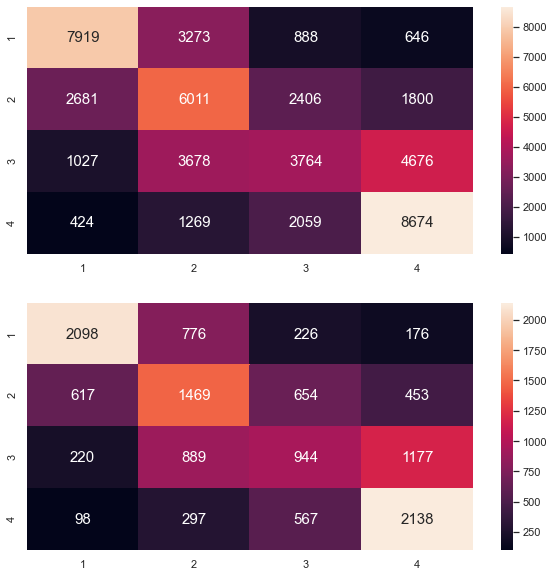

In [81]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, logR_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, logR_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,logR_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,logR_EGIN.predict(X_test_EGIN)))

In [82]:
logR_f1_EGIN = f1_score(y_test, logR_pred_EGIN, average='weighted')

print('F1 (Logistic Regression): ', "%.6f" % logR_f1_EGIN)

F1 (Logistic Regression):  0.512677


> After hyperparameter tuning, we do not observe any better performance from the use of the feature engineered data as compared to regular data. It seems that feature engineering does not help in this model.

Under the Logistic Regression, there is **no visible improvement in performance from applying the feature engineered data**.